In [1]:
import numpy as np
import os.path
from data import Instance, DataSet
from neural_network import NeuralNetwork
from activation_function import ActivationFunction
import matplotlib.pyplot as plt

In [2]:
data_set_1 = DataSet("data_set_1")

if (os.path.isfile(data_set_1.name)):
    data_set_1.loadFile()

else:
    data_set_size_1 = 1000
    for i in range(0, data_set_size_1):
        x1 = np.round(np.random.sample(3))
        x2 = np.random.sample(3) * 0.2 - 0.1
        x = [i+j for i,j in zip(x1,x2)]

        n = int(x1[0])*4 + int(x1[1])*2 + int(x1[2])
        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_1.add( Instance(x, y) )

    data_set_1.saveToFile()

In [3]:
data_set_4 = DataSet("data_set_4")

if (os.path.isfile(data_set_4.name)):
    data_set_4.loadFile()

else:
    data_set_size_4 = 1000
    for i in range(0, data_set_size_4):
        t = 2 * np.pi * np.random.sample(1)[0]
        u = np.random.sample(1)[0] + np.random.sample(1)[0]
        r = 2-u if u > 1 else u
        x = [r*np.cos(t), r*np.sin(t)]

        n = 0
        if(x[0] >= 0.0):
            n = 0 if x[1] >= 0.0 else 3
        else:
            n = 1 if x[1] >= 0.0 else 2

        n += 4 if np.absolute(x[1]) > 1.0 - np.absolute(x[0]) else 0

        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_4.add( Instance( x, y) )
        
    data_set_4.saveToFile()

In [4]:
step_func = ActivationFunction("step")
net = NeuralNetwork(3, [8], [step_func], 0.1)
data = net.trainDataSet(data_set_1, "estochastic", 10, momentum = 0.5, print_info = False, type = "class")

|| Epoch: 10 || 

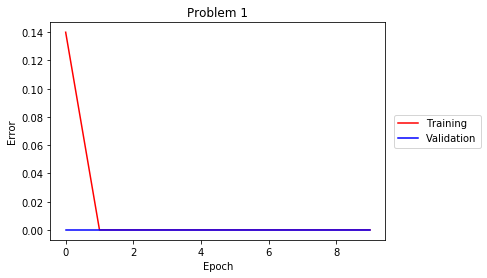

In [5]:
plt.title("Problem 1")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.30, 0.5))

In [6]:
step_func = ActivationFunction("step")
net = NeuralNetwork(2, [8], [step_func], 0.02)
data = net.trainDataSet(data_set_4, "estochastic", 100, momentum = 0.2, print_info = False, type = "class")

|| Epoch: 100 || 

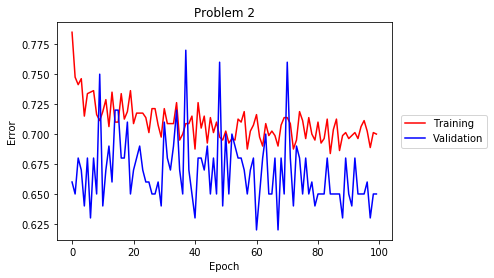

In [7]:
plt.title("Problem 2")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.30, 0.5))